### Loading Data from Files

In [1]:
import matplotlib.pyplot as plt
import csv
import os

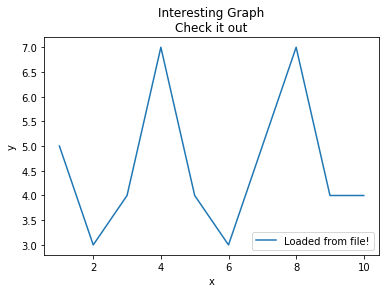

In [2]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('/home/shrinidhi/PycharmProjects/data-analysis/Data Visualization/example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

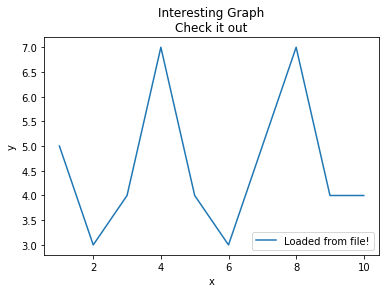

In [3]:
import numpy as np

x, y = np.loadtxt('/home/shrinidhi/PycharmProjects/data-analysis/Data Visualization/example.txt', delimiter=',', unpack=True)

plt.plot(x, y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

### Getting data from Internet

/home/shrinidhi/PycharmProjects/data-analysis/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  


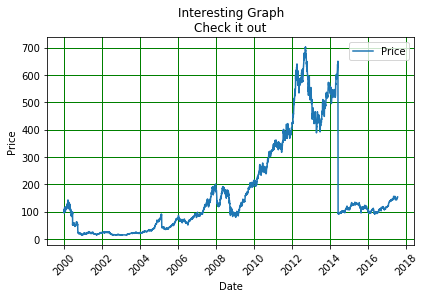

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates
import datetime as dt

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    ax1.grid(True, color='g', linestyle='-', linewidth=1)    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.16, right=0.94, wspace=0.2, hspace=0)
    plt.show()
    

graph_data('TSLA')

Unix Time Stamp

In [14]:
import datetime as dt
import time
import numpy as np

print(time.time())

example = time.time()
print(example)

print(dt.datetime.fromtimestamp(example))

dateconv = np.vectorize(dt.datetime.fromtimestamp)

print(dateconv)

1577117107.7074199
1577117107.7077672
2019-12-23 21:35:07.707767
